**Loading Dataset**

In [ ]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('TrafficTwoMonth.csv')

# Display the first few rows of the dataframe
df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10-10-2023,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10-10-2023,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10-10-2023,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10-10-2023,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10-10-2023,Tuesday,11,2,1,34,48,normal


Confusion Matrix:
 [[ 79   1   0   6]
 [  2  29   0   8]
 [  1   0  52   0]
 [  8   3   5 402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        86
           1       0.88      0.74      0.81        39
           2       0.91      0.98      0.95        53
           3       0.97      0.96      0.96       418

    accuracy                           0.94       596
   macro avg       0.91      0.90      0.90       596
weighted avg       0.94      0.94      0.94       596

Accuracy Score: 0.9429530201342282


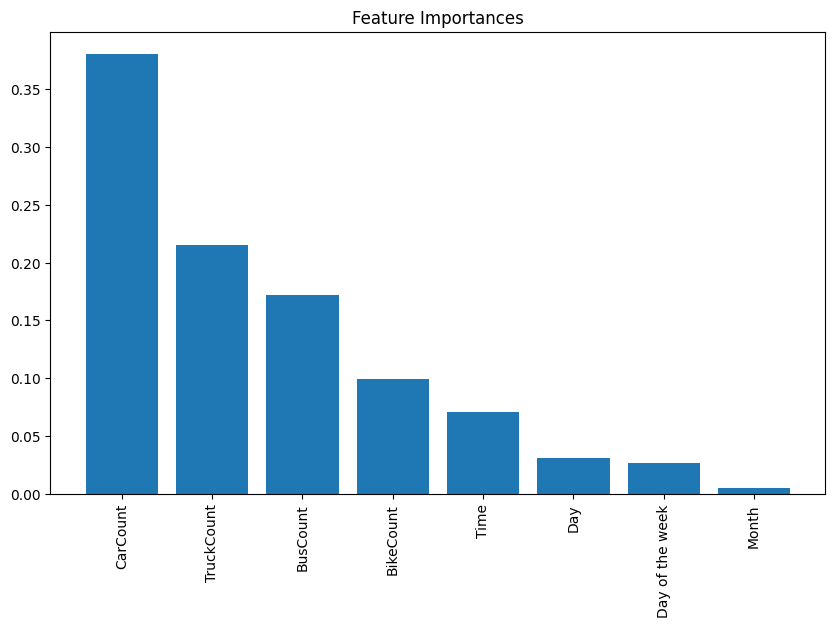

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('TrafficTwoMonth.csv')

# Convert 'Time' to datetime format and extract hour
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

# Convert 'Date' to datetime format and extract month and day
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Encoding categorical features
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

# Select features and target
X = df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Month', 'Day']]
y = df['Traffic Situation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


1. **Preprocessing:** The Time and Date columns are converted to
appropriate formats, and relevant features like Hour, Month, and Day are extracted.

2. **Label Encoding:** Categorical features like Day of the week and Traffic Situation are encoded to numerical values.
Feature Selection: The features (Time, Day of the week, CarCount, etc.) are selected for training.

3. **Model Training:** A RandomForestClassifier is used to predict the traffic situation.

4. **Evaluation:** The model’s performance is evaluated using confusion matrix, classification report, and accuracy score.

5. **Feature Importance:** A plot showing the importance of each feature in predicting the traffic situation is generated.

**Vehicle Counts Over Time graph**

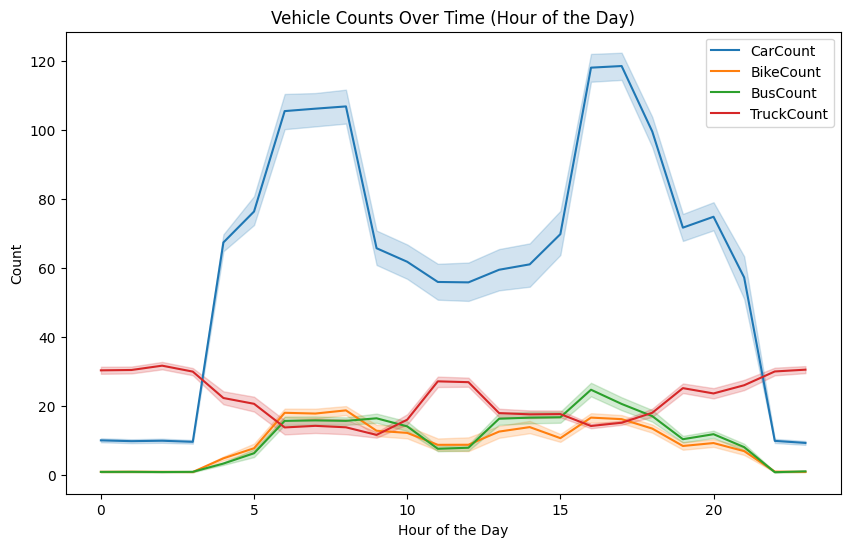

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Vehicle Counts Over Time (Hour of the Day)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Time', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Time', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Time', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()


**Total Vehicles by Day of the Week**

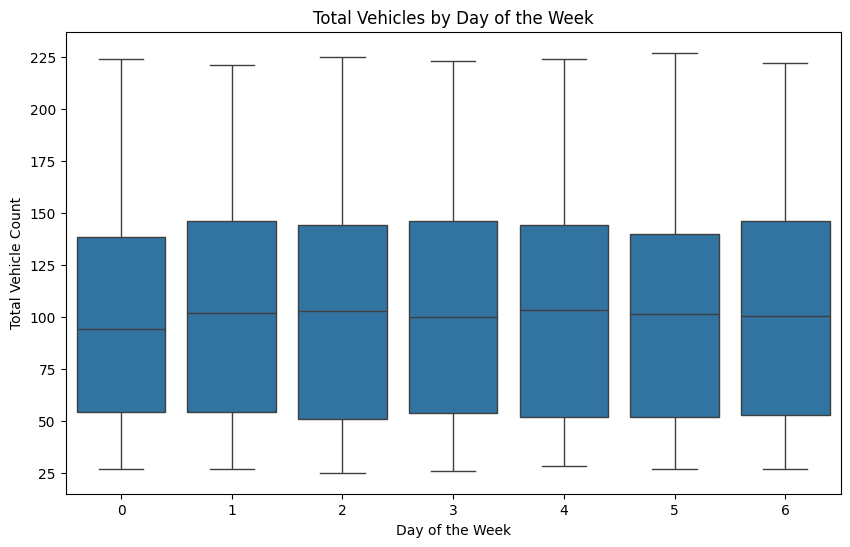

In [ ]:
# 2. Total Vehicles by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day of the week', y='Total')
plt.title('Total Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicle Count')
plt.show()



**Correlation Heatmap**

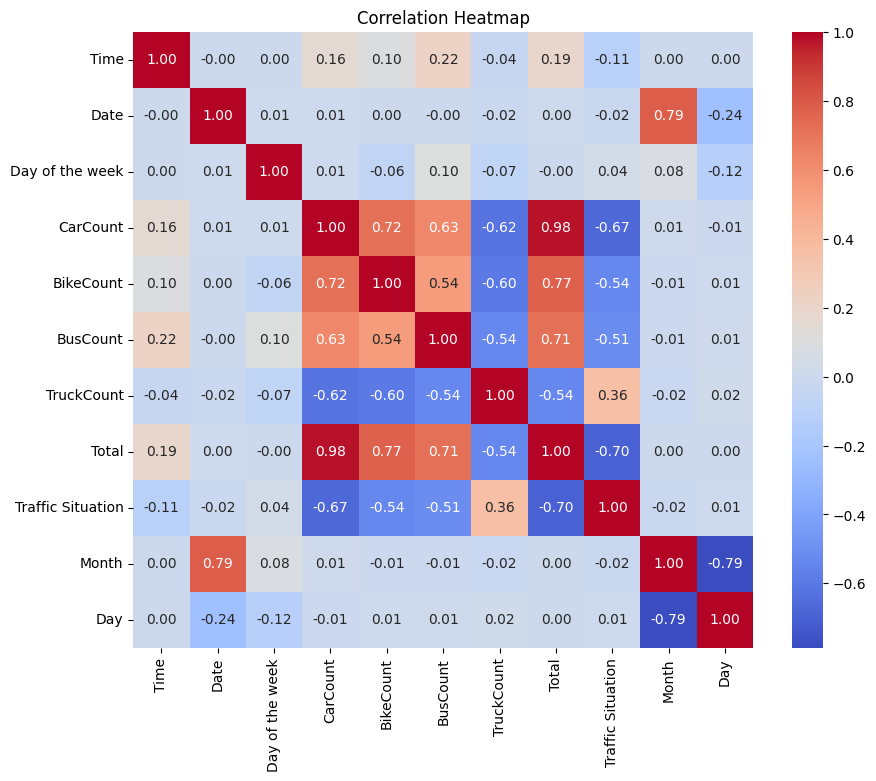

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



**Traffic Situation Distribution**

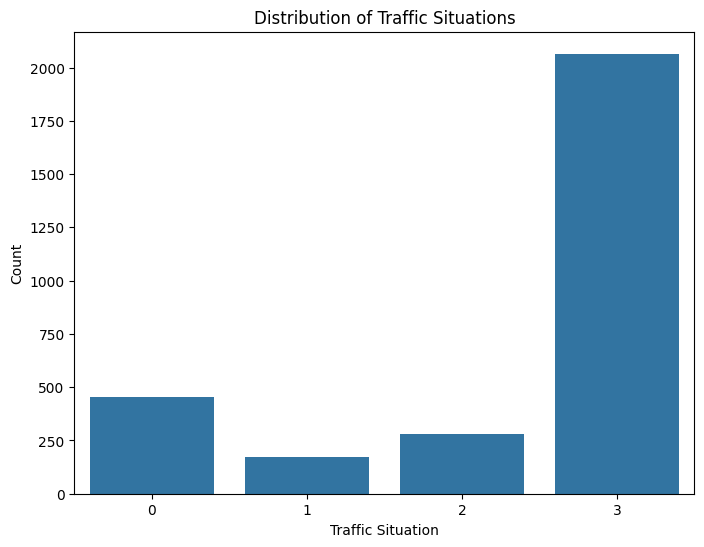

In [ ]:
# 4. Traffic Situation Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()



**Pairplot**

In [ ]:
# 5. Pairplot
sns.pairplot(df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']])
plt.show()

**Time vs Traffic Situation**

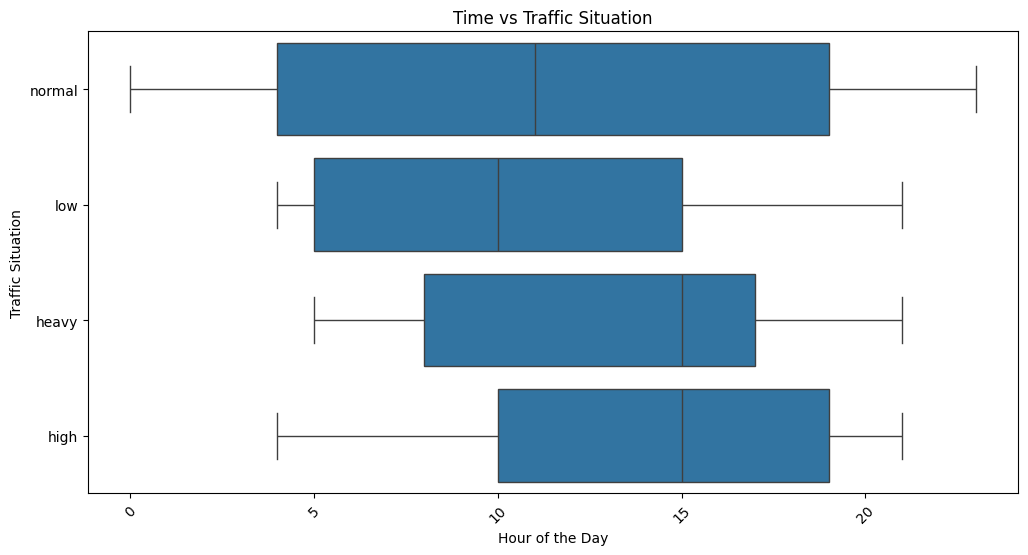

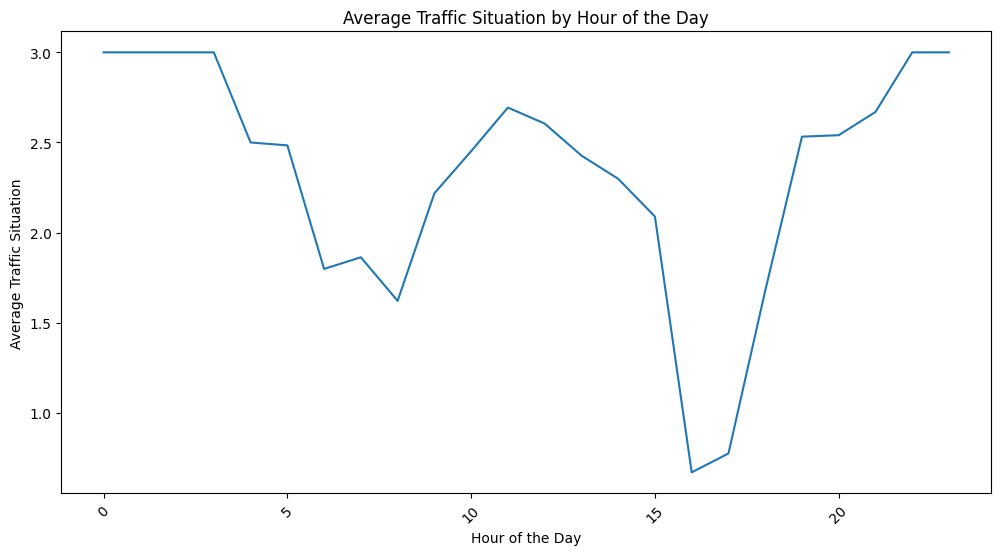

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Time vs Traffic Situation using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time', y='Traffic Situation', data=time_traffic_df)
plt.title('Time vs Traffic Situation')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Situation')
plt.xticks(rotation=45)
plt.show()

# Alternatively, a line plot to show average traffic situation over the hours
plt.figure(figsize=(12, 6))
avg_traffic_by_time = df.groupby('Time')['Traffic Situation'].mean()
sns.lineplot(x=avg_traffic_by_time.index, y=avg_traffic_by_time.values)
plt.title('Average Traffic Situation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Situation')
plt.xticks(rotation=45)
plt.show()



Explanation:
1. Boxplot:

*   This plot visualizes the distribution of the Traffic Situation across different hours of the day, without the order parameter.This makes it simpler and avoids the mismatch error.

2. Line Plot:



*   The line plot shows the average traffic situation for each hour of the day, providing a continuous view of traffic trends over time.



**ML MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define feature variables (X) and target variable (y)
X = df.drop(['Traffic Situation', 'Time', 'Date'], axis=1)
y = df['Traffic Situation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 333    0    0    0]
 [   0  121    0    1]
 [   0    0  216    1]
 [   1    1    0 1112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       0.99      0.99      0.99       122
           2       1.00      1.00      1.00       217
           3       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



**Feature Importance**

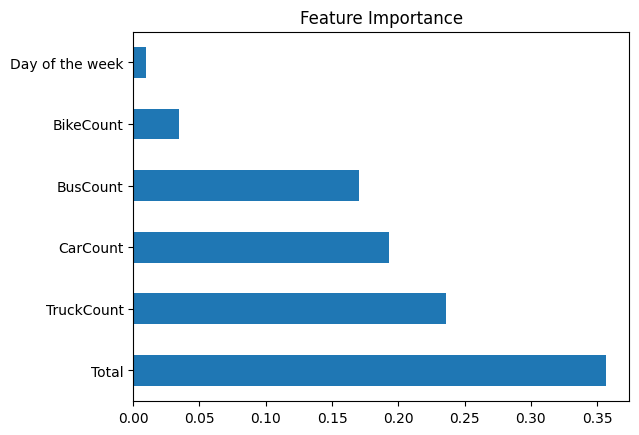

In [ ]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()
